In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv("Superstore_data.csv", encoding='latin-1')

In [140]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Oder Date,year,Order year
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016,2016
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016,2016
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016,2016
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015,2015
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015,2015


In [139]:
# setting row id as the index for entire data
df.set_index('Row ID' , inplace = True)

In [21]:
df.shape

(9994, 21)

In [141]:
df.drop_duplicates(inplace = True)

In [142]:
# Getting the basic information about the datatypes of each columns
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Oder Date        datetime64[ns]
year                      int32
Order year                int32
dtype: object

In [143]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Oder Date,year,Order year
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,55191.576403,229.852846,3.789753,0.156188,28.660971,2016-04-30 01:53:33.089162240,2015.722406,2015.722406
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014-01-03 00:00:00,2014.000000,2014.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.731000,2015-05-23 00:00:00,2015.000000,2015.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56560.000000,54.480000,3.000000,0.200000,8.671000,2016-06-26 00:00:00,2016.000000,2016.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017-05-14 00:00:00,2017.000000,2017.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017-12-30 00:00:00,2017.000000,2017.000000
std,NaN,NaN,32065.074478,623.276074,2.225149,0.206457,234.271476,NaN,1.123479,1.123479


In [22]:
# to find null values exist or not
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
# Ship Mode - univariate analysis
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [25]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

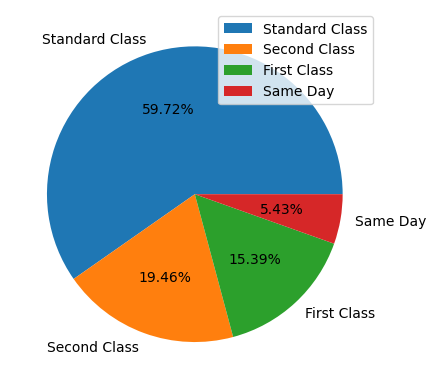

In [32]:
plt.pie(y , labels = x , autopct = "%0.2f%%")
plt.legend(loc = 1)
plt.show()

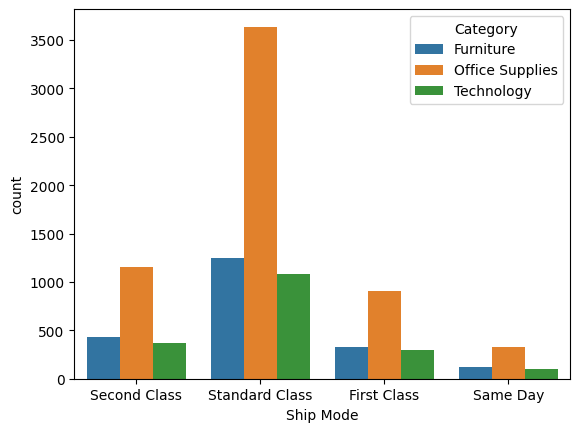

In [44]:
# analysing ship mode and category - bivariate analysis
sns.countplot(x = 'Ship Mode' , data = df , hue = 'Category')
plt.show()

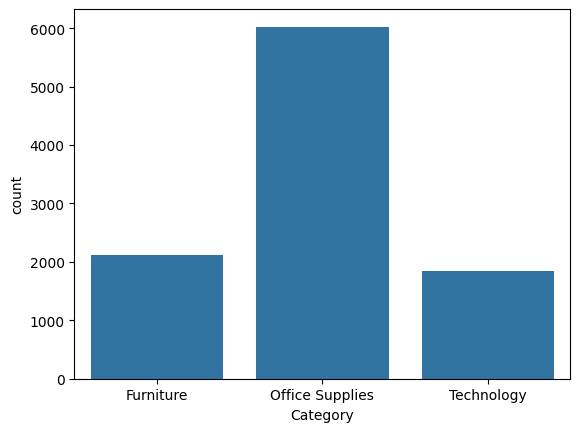

In [48]:
# category
sns.countplot(x = 'Category' , data = df)
plt.show()

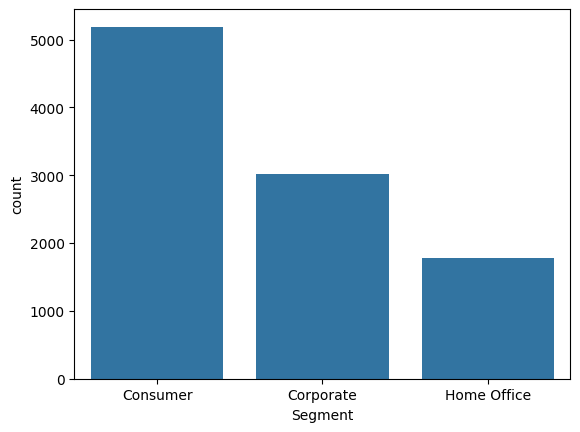

In [47]:
# customer segment
sns.countplot(x = 'Segment' , data = df)
plt.show()

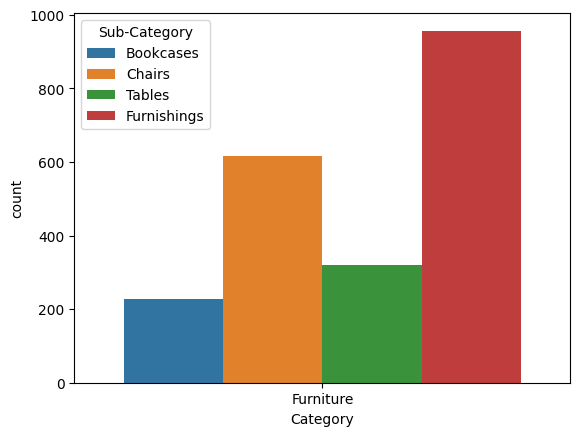

In [51]:
# analysing product category = 'furniture' and product sub-category
sns.countplot(x = 'Category' , data = df[df['Category'] == 'Furniture'] , hue = 'Sub-Category')
plt.show()

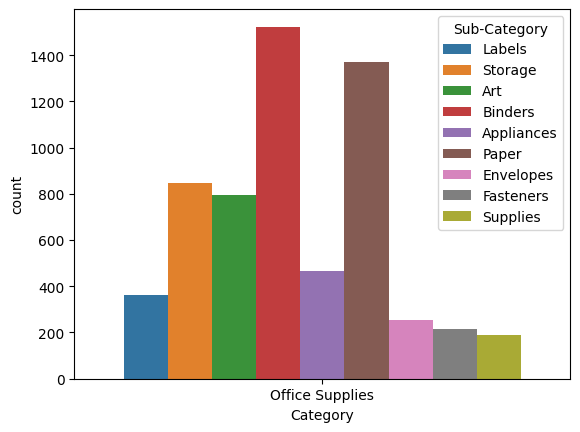

In [52]:
# analysing product category = 'office supplies' and product sub-category
sns.countplot(x = 'Category' , data = df[df['Category'] == 'Office Supplies'] , hue = 'Sub-Category')
plt.show()

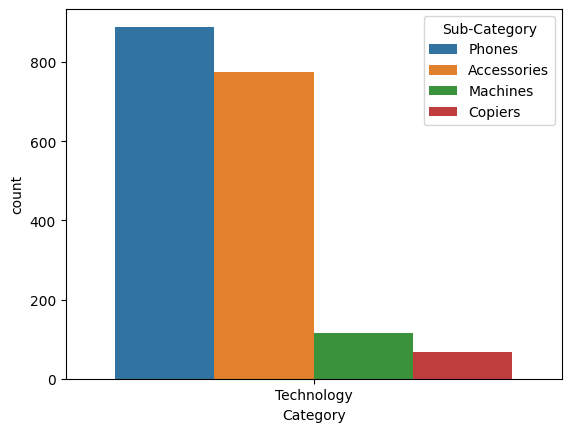

In [53]:
# analysing product category = 'technology' and product sub-category
sns.countplot(x = 'Category' , data = df[df['Category'] == 'Technology'] , hue = 'Sub-Category')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [86]:
# converting order date and ship date to datetime datatype
df['Order Date'] = pd.to_datetime(df['Order Date'] , format = '%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'] , format = '%d-%m-%Y')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [88]:
# extracting year from order date
df['Order year'] = pd.DatetimeIndex(df['Order Date']).year

In [96]:
# number of orders per year
df['Order year'].value_counts()

Order year
2017    3312
2016    2587
2015    2102
2014    1993
Name: count, dtype: int64

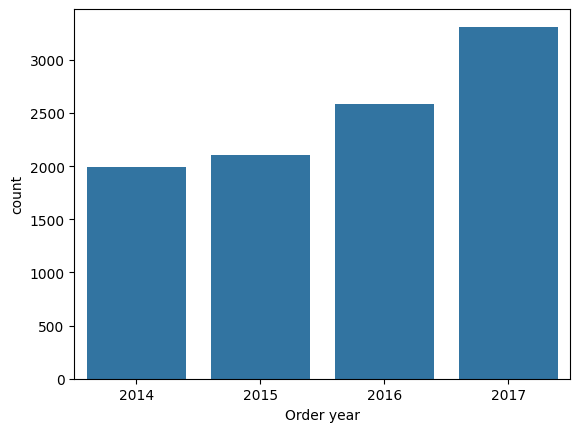

In [98]:
sns.countplot(x = 'Order year' , data = df)
plt.show()

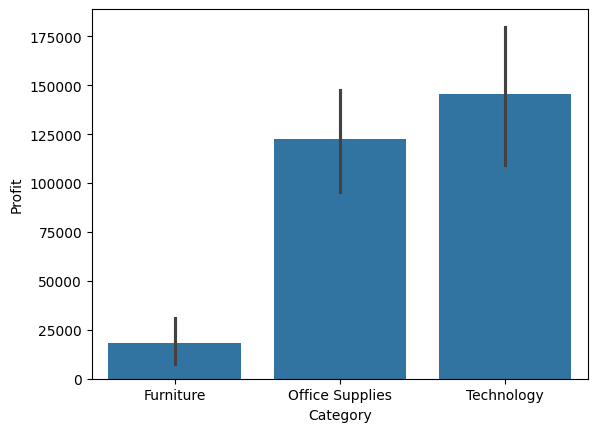

In [103]:
# category wise profit
sns.barplot(x = 'Category' , y = 'Profit' , data = df , estimator = 'sum')
plt.show()

In [107]:
# state wise number of orders
df['State'].value_counts().head()

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [108]:
# region wise number of orders
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

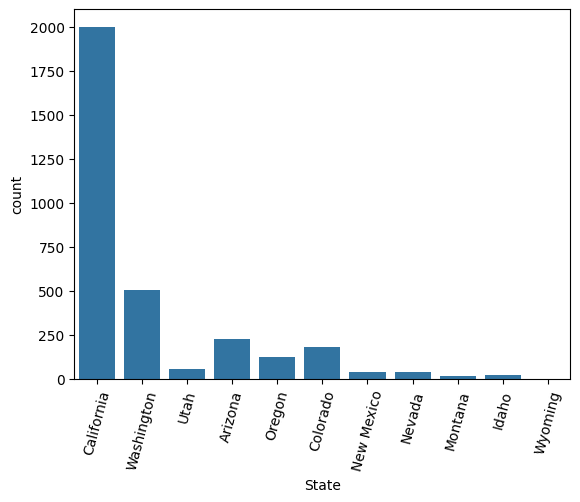

In [114]:
# state wise number of order when region = 'west'
sns.countplot(x = 'State' , data = df[df['Region'] == 'West'])
plt.xticks(rotation = 75)
plt.show()

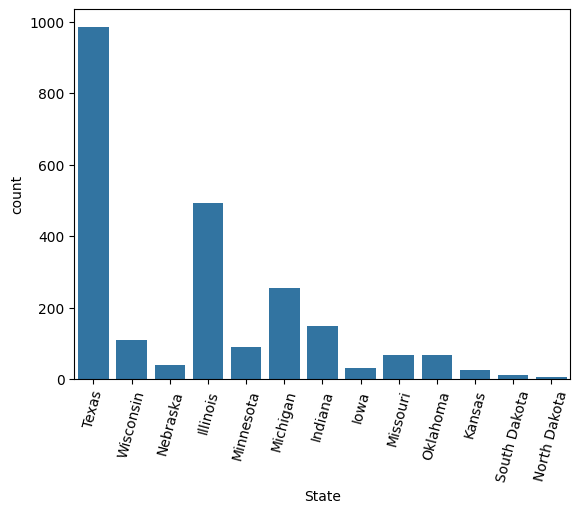

In [116]:
# state wise number of order when region = 'central'
sns.countplot(x = 'State' , data = df[df['Region'] == 'Central'])
plt.xticks(rotation = 75)
plt.show()

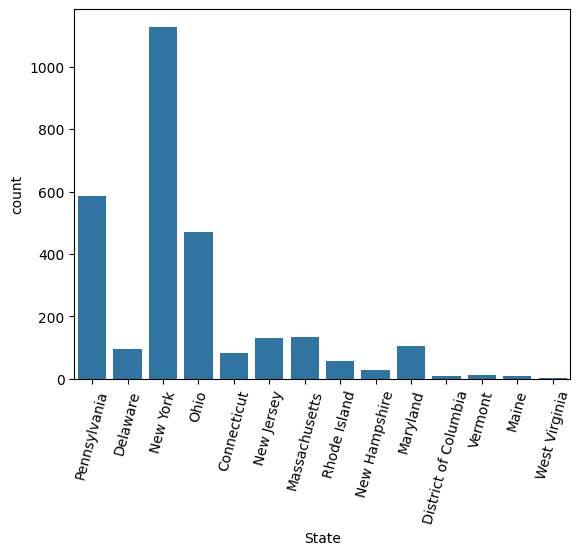

In [118]:
# state wise number of order when region = 'east'
sns.countplot(x = 'State' , data = df[df['Region'] == 'East'])
plt.xticks(rotation = 75)
plt.show()

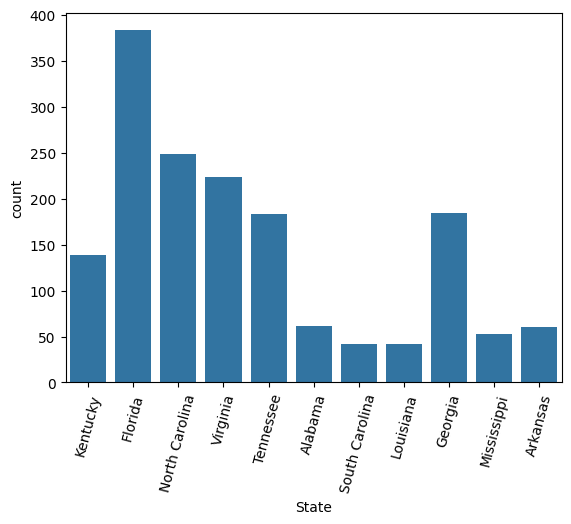

In [119]:
# state wise number of order when region = 'south'
sns.countplot(x = 'State' , data = df[df['Region'] == 'South'])
plt.xticks(rotation = 75)
plt.show()

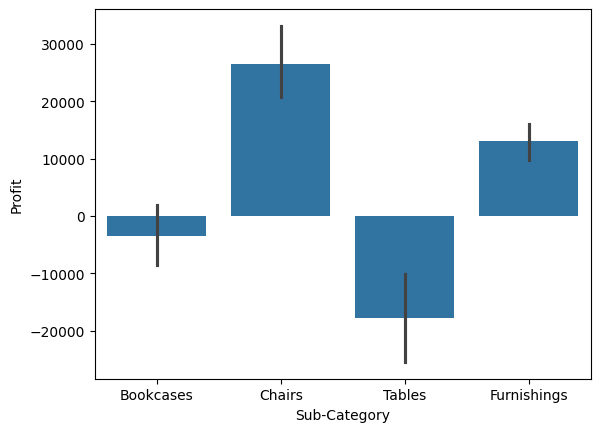

In [123]:
# subcategry wise profit when category = 'Furniture'
sns.barplot(x = 'Sub-Category' , y = 'Profit' , data = df[df['Category'] == 'Furniture'] , estimator = 'sum')
plt.show()

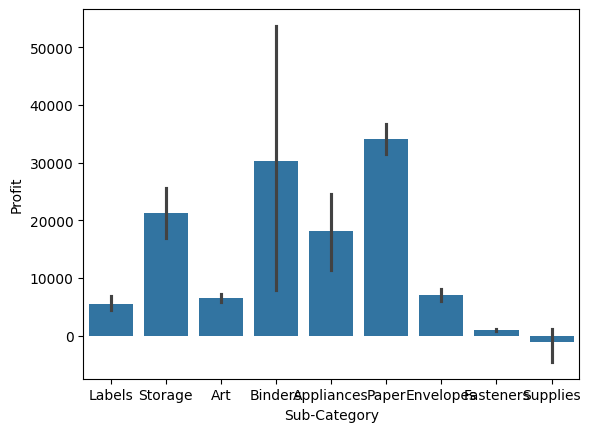

In [124]:
# subcategry wise profit when category = 'office supplies'
sns.barplot(x = 'Sub-Category' , y = 'Profit' , data = df[df['Category'] == 'Office Supplies'] , estimator = 'sum')
plt.show()

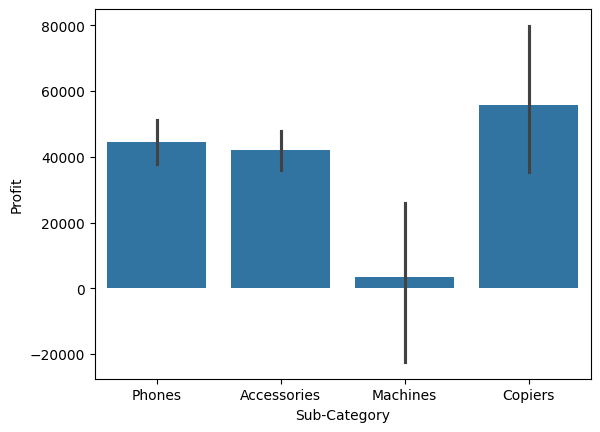

In [125]:
# subcategry wise profit when category = 'Technology'
sns.barplot(x = 'Sub-Category' , y = 'Profit' , data = df[df['Category'] == 'Technology'] , estimator = 'sum')
plt.show()

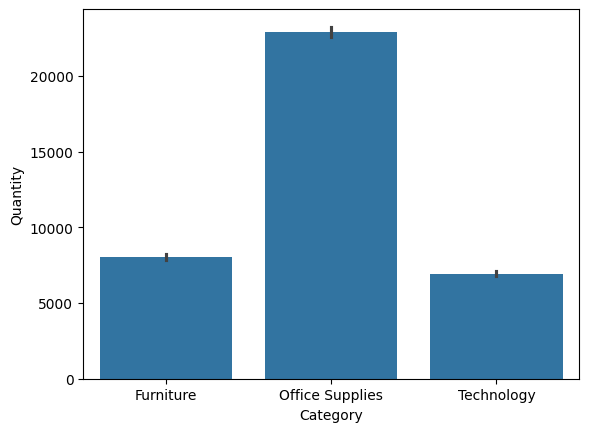

In [126]:
# quantity of items per category
sns.barplot(x = 'Category' , y = 'Quantity' , data = df , estimator = 'sum')
plt.show()

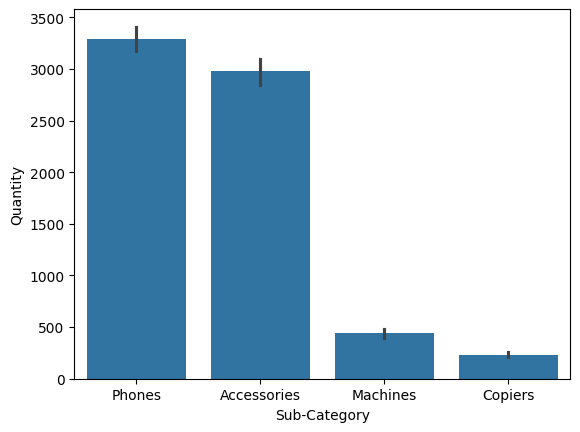

In [127]:
# quantity of items sub-category wise when category = 'technology'
sns.barplot(x = 'Sub-Category' , y = 'Quantity' , data = df[df['Category'] == 'Technology'] , estimator = 'sum')
plt.show()

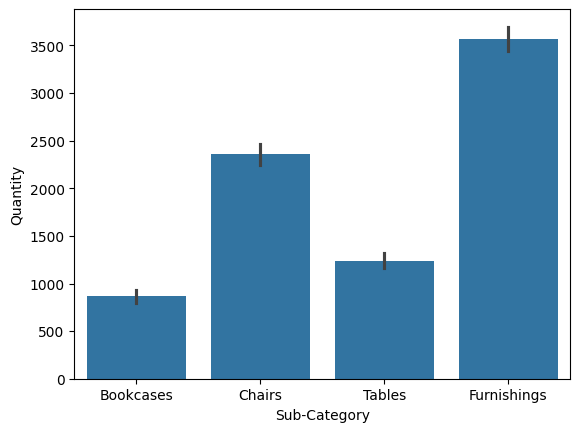

In [128]:
# quantity of items sub-category wise when category = 'furniture'
sns.barplot(x = 'Sub-Category' , y = 'Quantity' , data = df[df['Category'] == 'Furniture'] , estimator = 'sum')
plt.show()

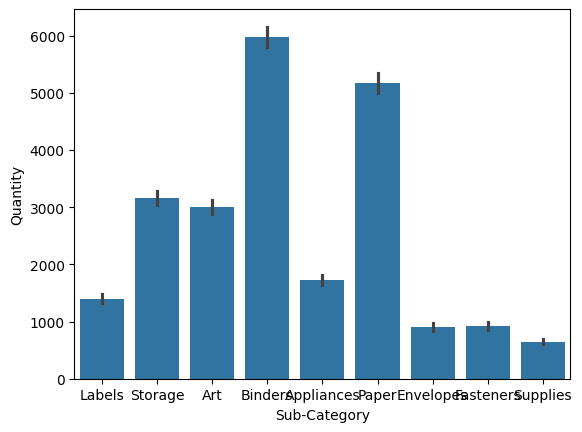

In [136]:
# quantity of items sub-category wise when category = 'office supplies'
sns.barplot(x = 'Sub-Category' , y = 'Quantity' , data = df[df['Category'] == 'Office Supplies'] , estimator = 'sum')
plt.show()